In [1]:
using Plots
gr()

Plots.GRBackend()

In [2]:
using Distributions
using StatsBase
using SymPy

In [3]:
@syms x λ

(x, λ)

In [35]:
function psi(x,λ)
    return exp(-λ*x^2)
end

psi (generic function with 1 method)

In [36]:
function psi2(x,λ)
    return psi(x,λ)^2
end

psi2 (generic function with 1 method)

In [6]:
diff(psi(x,λ),x,2)

                    2  
    ⎛   2      ⎞  -x ⋅λ
2⋅λ⋅⎝2⋅x ⋅λ - 1⎠⋅ℯ     

In [37]:
function V(x,b)
    return (x^2)/2 + b*(x^4)
end

V (generic function with 1 method)

In [38]:
function Hpsi(x,λ,b)
    return -(2λ*(2(x^2)λ - 1))psi(x,λ)/2 + V(x,b)psi(x,λ)
end

Hpsi (generic function with 1 method)

In [39]:
function point(δ)
    return δ*(2*rand()-1)
end

point (generic function with 1 method)

In [40]:
function Monte(N,λ,b)
    δ = 5.0
    
    S = 2δ
    
    count = 0
    for i in 1:N
        
        x = point(δ)
        y = rand()
        
        if y <= psi(x,λ)*Hpsi(x,λ,b)
            count += 1
        end
        
    end
    
    psiHpsi = S*count/N
    
    count = 0
    for i in 1:N
        
        x = point(δ)
        y = rand()
        
        if y <= psi2(x,λ)
            count += 1
        end
        
    end
    
    psipsi = S*count/N
    
    E = psiHpsi/psipsi
    
    println("psiHpsi = $psiHpsi")
    println("psipsi = $psipsi")
    
    println("E = $E")
    println()
end

Monte (generic function with 1 method)

In [80]:
function main()

    N = 1000000
    λ = 0.5
    b = 1/8
#     b = -1/8
    Monte(N,λ,b)
    
    @show exact = 1/2 + b*3/(16*λ^2)
    
end

main()

psiHpsi = 1.05063
psipsi = 1.76996
E = 0.5935896856426134

exact = 1 / 2 + (b * 3) / (16 * λ ^ 2) = 0.59375


0.59375

In [77]:
function metoro(N,λ,b)
    
    δ = 3.0
    x = 1.0
    count = 0
    
    # 確率分布に収束させるために、最初は飛ばす
    while count <= 10000
        
        x_trial = x + point(δ)
        w = psi2(x_trial,λ)/psi2(x,λ)
        
        if rand() <= w
            x = x_trial
            count = count+1
        end
        
    end
    
    sumE = 0
    sumE2 = 0
    ac = 0
    count = 0
    while count <= N
        
        x_trial = x + point(δ)
        w = psi2(x_trial,λ)/psi2(x,λ)
        
        if rand() <= w
            x = x_trial
            ac += 1
        end

        count = count+1
        tempE = Hpsi(x,λ,b)/psi(x,λ)
        sumE += tempE
        sumE2 += tempE^2

    end
    
    @show sumE
    @show E = sumE/N
    @show V = sumE2/N - E^2
    @show ac/N
    @show error = sqrt(V)/sqrt(N)
    
end

metoro (generic function with 1 method)

In [79]:
function main2()
    N = 10000
    b = 1/8
    
    for λ in 0.1:0.1:1
        @show λ
        metoro(N,λ,b)
        println()
    end
end
main2()

λ = 0.1
sumE = 41319.64672718943
E = sumE / N = 4.131964672718943
V = sumE2 / N - E ^ 2 = 123.866276124243
ac / N = 0.6509
error = sqrt(V) / sqrt(N) = 0.11129522726704996

λ = 0.2
sumE = 13972.87354899819
E = sumE / N = 1.397287354899819
V = sumE2 / N - E ^ 2 = 12.118159748325182
ac / N = 0.5363
error = sqrt(V) / sqrt(N) = 0.03481114727831472

λ = 0.3
sumE = 8422.846635974995
E = sumE / N = 0.8422846635974994
V = sumE2 / N - E ^ 2 = 1.3730669556746236
ac / N = 0.4523
error = sqrt(V) / sqrt(N) = 0.011717793971881498

λ = 0.4
sumE = 6592.110725263978
E = sumE / N = 0.6592110725263978
V = sumE2 / N - E ^ 2 = 0.3327716667261809
ac / N = 0.4048
error = sqrt(V) / sqrt(N) = 0.005768636465631899

λ = 0.5
sumE = 6097.145603251476
E = sumE / N = 0.6097145603251476
V = sumE2 / N - E ^ 2 = 0.11589809217134661
ac / N = 0.3807
error = sqrt(V) / sqrt(N) = 0.003404380886025337

λ = 0.6
sumE = 5744.787214836152
E = sumE / N = 0.5744787214836152
V = sumE2 / N - E ^ 2 = 0.018803094232132167
ac / N = 0.32

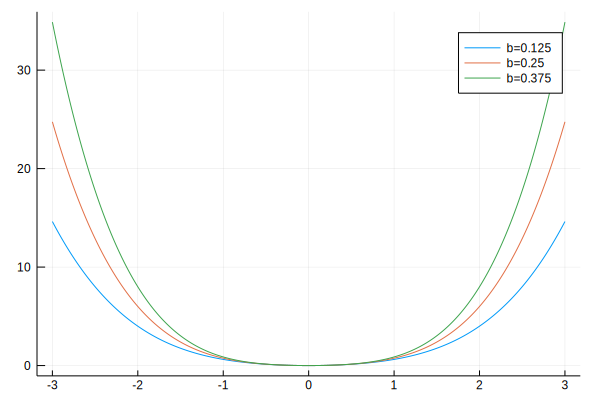

In [12]:
x = -3:0.01:3
b = 1/8
plot(x,V.(x,b),label="b=$b")
b = 2/8
plot!(x,V.(x,b),label="b=$b")
b = 3/8
plot!(x,V.(x,b),label="b=$b")

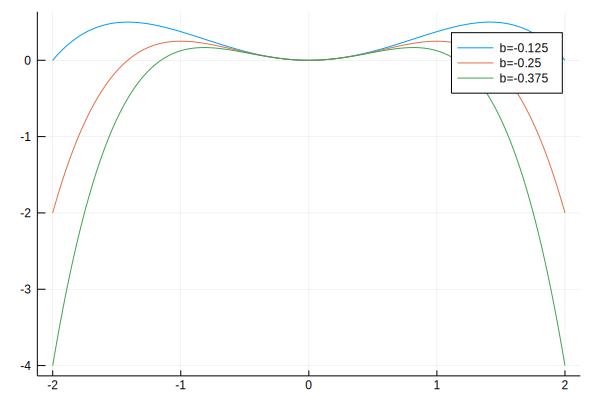

In [55]:
x = -2:0.01:2
b = -1/8
plot(x,V.(x,b),label="b=$b")
b = -2/8
plot!(x,V.(x,b),label="b=$b")
b = -3/8
plot!(x,V.(x,b),label="b=$b")

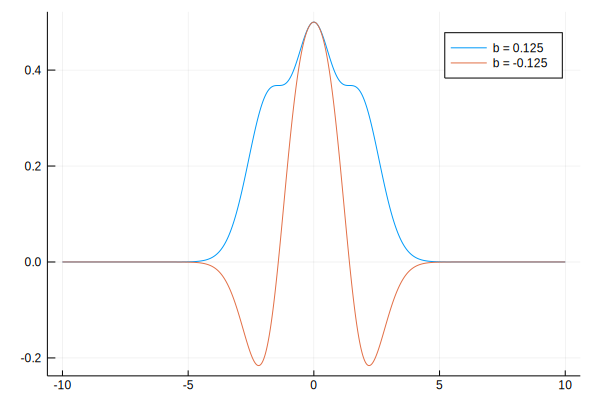

In [14]:
x = -10:0.01:10
λ = 0.5
b = 1/8
plot(x,Hpsi.(x,λ,b),label="b = $b")
b = -1/8
plot!(x,Hpsi.(x,λ,b),label="b = $b")